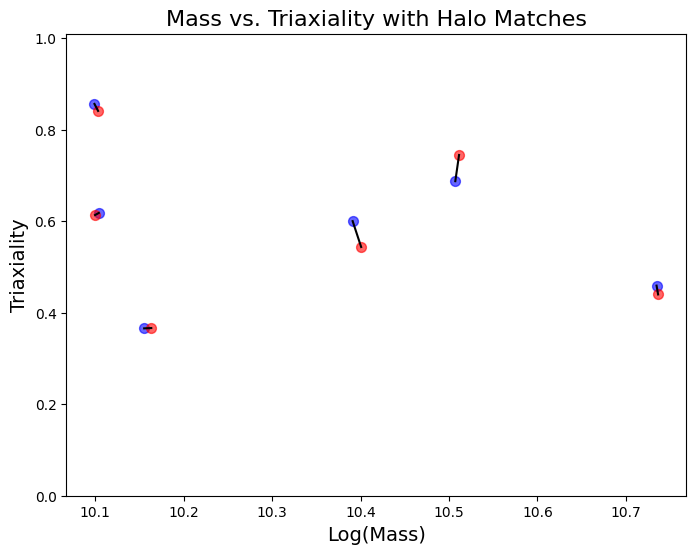

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load halo match data
matches_df = pd.read_csv('halo_matches.csv')

# Load the data from CSV
df = pd.read_csv('AK_properties.csv')

# Extract data from DataFrame
masses_1 = df['Mass']
triaxialities_1 = df['Triaxiality']

# Perturb data for simulation 2
np.random.seed(0)  # for reproducibility
masses_2 = df['Mass'] * (1 + np.random.normal(0, 0.01, len(df)))  # 1% noise
triaxialities_2 = df['Triaxiality'] * (1 + np.random.normal(0, 0.05, len(df)))  # 5% noise

fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over matches and plot matched halos
for index, row in matches_df.iterrows():
    halo1, halo2 = int(row['Halo1']), int(row['Halo2'])
    
    # Plot matched halos from Simulation 1
    ax.scatter(np.log10(masses_1[halo1]), triaxialities_1[halo1], color='blue', s=50, alpha=0.6)
    
    # Plot matched halos from Simulation 2
    ax.scatter(np.log10(masses_2[halo2]), triaxialities_2[halo2], color='red', s=50, alpha=0.6)
    
    # Draw connecting line
    ax.plot([np.log10(masses_1[halo1]), np.log10(masses_2[halo2])],
            [triaxialities_1[halo1], triaxialities_2[halo2]], 'k', alpha=1)

# Set labels and title
ax.set_xlabel('Log(Mass)', fontsize=14)
ax.set_ylabel('Triaxiality', fontsize=14)
ax.set_title('Mass vs. Triaxiality with Halo Matches', fontsize=16)
ax.set_ylim([0, 1.01])

plt.show()
